# The Solow model with climate change

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol, symbols, Eq, solve
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

from tabulate import tabulate

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
from modelproject import SolowModelClass 
model = SolowModelClass()

# Model description

Our model project is greatly inspired by the exam in Macroeconomics I from 09 January 2020. The exam looks at the classic Solow model with technological growth and explores different levels of climate change, that cause damage to the production output with the fraction D. 

$$
\begin{aligned}
Y_t &= [1-D]K_t^\alpha (A_t L_t)^{1-\alpha}, 0 <\alpha<1\\
D &= 1-\frac{1}{1+\sigma{(\Delta T)}^2}, \sigma > 0 \\
K_{t+1} &= s Y_t+(1-\delta) K_t, 0<s<1,0<\delta<1,K_0>0 \\
A_{t+1} &=(1+g)A_t, A_0>0 \\
L_{t+1} &=(1+n)A_t, L_0>0
\end{aligned}
$$

The first equation is a Cobb-Douglas production function describing total output $(Y_t)$ as a function of physical capital $(K_t)$, population size $(L_t)$ and technology level $(A_t)$. We assume that climate change reduces output by share D; i.e. a part of output $(DY_t)$ is destroyed and only the share $1-D$ of output can be used for consumption and investment. The damage from climate change is given by the second equation, where $T$ measures change in temperature. Capital accumulation is described by the third equation, where $s$ is the saving rate and $\delta$ is the attrition rate. The last two equations indicate how the level of technology $(A_t)$ and the population $(L_t)$ evolve over time.

We define $\tilde y_t=\frac{Y_t}{A_tL_t}$ and $\tilde k_t = \frac{K_t}{A_tL_t}$.

## Analytical solution

We find the transition equation for capital per worker:

$$
\begin{aligned}
\frac{K_{t+1}}{A_{t+1} L_{t+1}} & =\frac{s Y_t+(1-\delta) K_t}{(1+g)(1+n) A_t L_t} \Leftrightarrow \\
\tilde{k}_{t+1} & =\frac{1}{(1+n)(1+g)}\left(s \tilde{y}_t+(1-\delta) \tilde{k}_t\right) \Leftrightarrow \\
\tilde{k}_{t+1} & =\frac{1}{(1+n)(1+g)}\left(s[1-D] \tilde{k}_t^\alpha+(1-\delta) \tilde{k}_t\right)
\end{aligned}
$$

In steady state $\tilde{k}_{t+1}=\tilde{k}_{t}=\tilde{k}^*$. We then find the steady state for capital to be: 

In [9]:
model.solve_analytical_ss()

((-delta - g*n - g - n)/(s*(D - 1)))**(1/(alpha - 1))

The transition equation can be shown in a phase diagram, where we see that the model converges to it's steady state value, irrespective of starting value.

In [10]:
def phasediagram(d,T) :
    val = model.val

    # Create lists
    kt1_list = []
    diagonal_list = []

        
    for t in range(0,T):
        k_t1 = (val.s*(1-d)*t**val.alpha+(1-val.delta)*t)/((1+val.n)*(1+val.g))
        kt1_list.append(k_t1)

    for t in range(0,T):
        diagonal = t
        diagonal_list.append(diagonal)             
            
    #Steadystate
    #ss = model.solve_num_ss()


    # Plot
    plt.figure(figsize=(5,5))
    plt.plot(diagonal_list, kt1_list, label=r'$\tilde k_{t+1}$', color = 'red')
    plt.plot(diagonal_list, diagonal_list, label='45 degree line', color = 'black')
    #plt.scatter(model.D_vector.k_ss_list, model.D_vector.k_ss_list, c='g', linewidths=3, label='Steady State')
    #plt.text(ss, ss, '({}, {})'.format(round(ss,2), round(ss,2)))
    plt.xlim(0,T)
    plt.ylim(0,T)
    plt.ylabel(r'$\tilde k_{t+1}$')
    plt.xlabel(r'$\tilde k_t$')
    plt.grid(True)
    plt.legend()
    plt.title('Figure 1: Phase diagram')
    return plt.show()

widgets.interact(phasediagram, 
                        d     =  widgets.FloatSlider(description = 'D' , min = 0 ,    max = 1 , step = 0.1 , value = 0.0),
                        T     = widgets.IntSlider(description='Time' ,          min = 0,     max = 50, step = 1,    value = 10))


interactive(children=(FloatSlider(value=0.0, description='D', max=1.0), IntSlider(value=10, description='Time'…

<function __main__.phasediagram(d, T)>

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [ ]:
model.solve_num_ss()

We vary the amount of climate changes D: 

In [ ]:
model.D_vector()

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

### Simulation

In the following we wish to simulate the development in...

In [12]:
model.solve_sigma()

sigma = 0.013258


In [13]:
model = SolowModelClass()
sim = model.sim
model.simulate()
model.simulate2()
model.simulate3()

(0.5, 8.0)

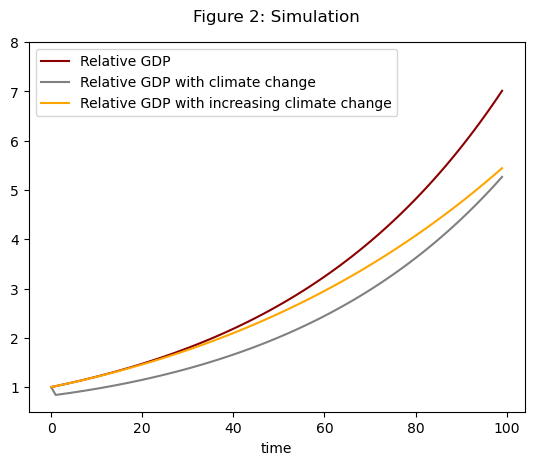

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(model.par.simT),sim.fracY,label='Relative GDP',c='darkred')
ax.plot(np.arange(model.par.simT),sim.fracYD,label='Relative GDP with climate change',c='grey')
ax.plot(np.arange(model.par.simT),sim.fracYDgrowth,label='Relative GDP with increasing climate change',c='orange')
ax.set_xlabel('time')
ax.set_title('Figure 2: Simulation',pad=15)
ax.legend(frameon=True);
plt.ylim([0.5,8])

### Extension

# Conclusion

Add concise conclusion. 